Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных. Выполнил Суслов Сергей
# Часть 1
1.	Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к
a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),
 б) равномерному.
2.	 Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
3.	Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).


# Нормальное распределение с несмещенной медианой

In [114]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
import seaborn as sns
%matplotlib inline

Первый датасет содержит игроков из компьютерного футбольного симулятора EA SPORTS FC 25 (https://www.kaggle.com/datasets/nyagami/ea-sports-fc-25-database-ratings-and-stats)

In [115]:
data = pd.read_csv('all_players.csv')
data

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17732,1571,17146,Araya Dennis,53,42,57,49,52,25,...,England,Barclays WSL,Spurs,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17733,17733,1572,17146,Alexia Férnandez,53,53,55,51,53,34,...,Spain,Liga F,Granada CF,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17734,17734,1573,17146,Aleigh Gambone,53,60,58,53,56,49,...,United States,Scottish Women's League,Glasgow City FC,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17735,17735,1574,17146,Joy Lysser,53,61,52,48,56,53,...,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           17737 non-null  int64  
 1   Unnamed: 0             17737 non-null  int64  
 2   Rank                   17737 non-null  int64  
 3   Name                   17737 non-null  object 
 4   OVR                    17737 non-null  int64  
 5   PAC                    17737 non-null  int64  
 6   SHO                    17737 non-null  int64  
 7   PAS                    17737 non-null  int64  
 8   DRI                    17737 non-null  int64  
 9   DEF                    17737 non-null  int64  
 10  PHY                    17737 non-null  int64  
 11  Acceleration           17737 non-null  int64  
 12  Sprint Speed           17737 non-null  int64  
 13  Positioning            17737 non-null  int64  
 14  Finishing              17737 non-null  int64  
 15  Sh

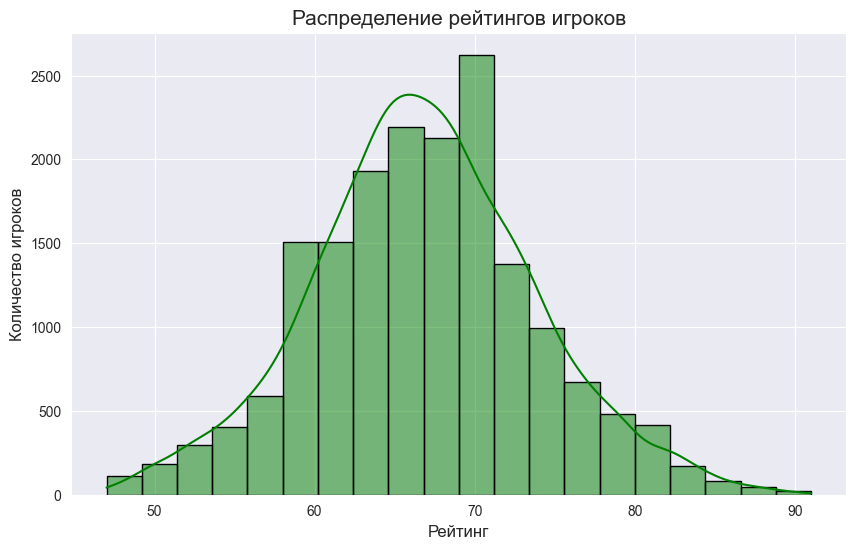

In [117]:
column = 'OVR' # Рейтинг игрока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column, bins=20, kde=True, color='green', edgecolor='black')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.title('Распределение рейтингов игроков', fontsize=15)
plt.grid(True)
plt.show()

In [118]:
# Вычисление среднего значения
mean_value = data[column].mean()
print(f"Среднее значение столбца '{column}': {mean_value}")

# Вычисление медианы
median_value = data[column].median()
print(f"Медиана столбца '{column}': {median_value}")

# Вычисление моды
mode_values = data[column].mode()
print(f"Мода столбца '{column}':")
for val in mode_values:
    print(val)

# Вычисление размаха
range_value = data[column].max() - data[column].min()
threshold = 0.15 * range_value
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

# Вычисление разницы между средним и медианой
diff = abs(mean_value - median_value)
print(f"Разница между средним и медианой: {diff}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение столбца 'OVR': 66.79624513728365
Медиана столбца 'OVR': 67.0
Мода столбца 'OVR':
66
Пороговое значение для смещённой медианы (15% размаха): 6.6
Разница между средним и медианой: 0.20375486271635168
Распределение не имеет значительного смещения медианы относительно среднего.


Второй датасет содержит заработные платы сотрудников (https://www.kaggle.com/datasets/anninasimon/employee-salary-dataset)

In [119]:
data = pd.read_csv('Employee_Salary_Dataset.csv')
data

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000
5,6,25,62,Male,5001000
6,7,19,54,Female,800000
7,8,2,21,Female,9000
8,9,10,36,Female,61500
9,10,15,54,Female,650000


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Age               35 non-null     int64 
 3   Gender            35 non-null     object
 4   Salary            35 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


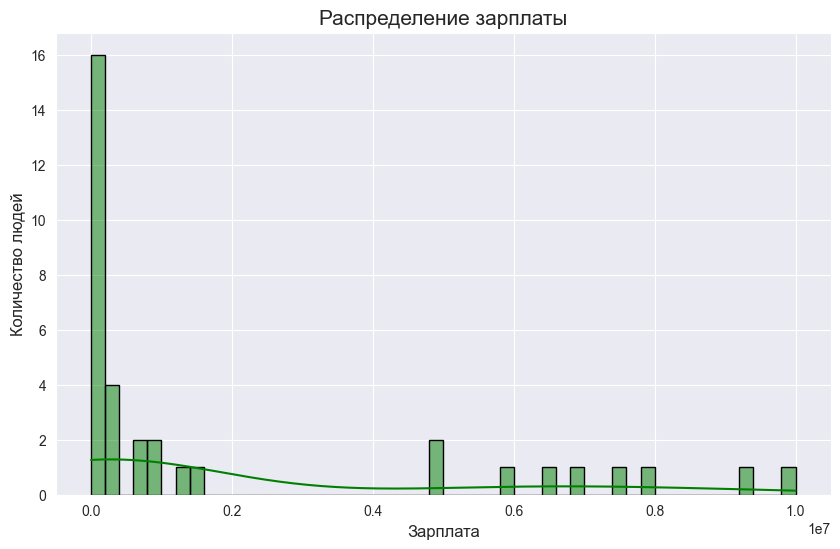

In [121]:
column = 'Salary' # Зарплата сотрудника
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column, bins=50, kde=True, color='green', edgecolor='black')
plt.xlabel('Зарплата', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.title('Распределение зарплаты', fontsize=15)
plt.grid(True)
plt.show()

In [122]:
# Вычисление среднего значения
mean_value = data[column].mean()
print(f"Среднее значение столбца '{column}': {mean_value}")

# Вычисление медианы
median_value = data[column].median()
print(f"Медиана столбца '{column}': {median_value}")

# Вычисление моды
mode_values = data[column].mode()
print(f"Мода столбца '{column}':")
for val in mode_values:
    print(val)

# Вычисление размаха
range_value = data[column].max() - data[column].min()
threshold = 0.15 * range_value
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

# Вычисление разницы между средним и медианой
diff = abs(mean_value - median_value)
print(f"Разница между средним и медианой: {diff}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение столбца 'Salary': 2059147.142857143
Медиана столбца 'Salary': 250000.0
Мода столбца 'Salary':
25000
250000
Пороговое значение для смещённой медианы (15% размаха): 1499550.0
Разница между средним и медианой: 1809147.142857143
Распределение имеет смещённую медиану относительно среднего на ~15% размаха.


# Равномерное распределение

Третий датасет просто содержит числа от 0 до 80000 (https://www.kaggle.com/datasets/lallucycle/random-numbers)

In [123]:
data = pd.read_csv('label_encodings.csv')
data

,encodings
0,0
1,0
2,0
3,0
4,0
...,...
203087,80880
203088,80880
203089,80880
203090,80881


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203092 entries, 0 to 203091
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   encodings  203092 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


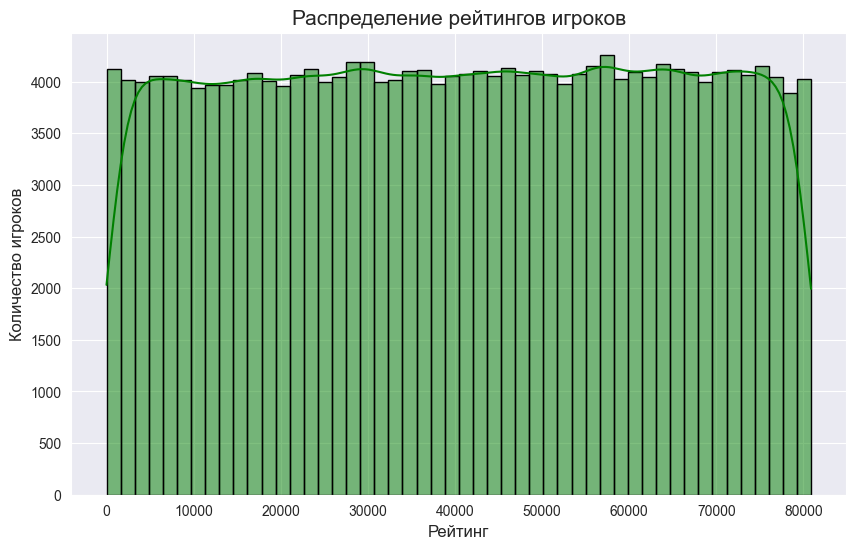

In [125]:
column = 'encodings' # Число
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=column, bins=50, kde=True, color='green', edgecolor='black')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.title('Распределение рейтингов игроков', fontsize=15)
plt.grid(True)
plt.show()

In [126]:
# Вычисление среднего значения
mean_value = data[column].mean()
print(f"Среднее значение столбца '{column}': {mean_value}")

# Вычисление медианы
median_value = data[column].median()
print(f"Медиана столбца '{column}': {median_value}")

# Вычисление моды
mode_values = data[column].mode()
print(f"Мода столбца '{column}':")
for val in mode_values:
    print(val)

# Вычисление размаха
range_value = data[column].max() - data[column].min()
threshold = 0.15 * range_value
print(f"Пороговое значение для смещённой медианы (15% размаха): {threshold}")

# Вычисление разницы между средним и медианой
diff = abs(mean_value - median_value)
print(f"Разница между средним и медианой: {diff}")

if diff >= threshold:
    print("Распределение имеет смещённую медиану относительно среднего на ~15% размаха.")
else:
    print("Распределение не имеет значительного смещения медианы относительно среднего.")

Среднее значение столбца 'encodings': 40540.091268981545
Медиана столбца 'encodings': 40626.5
Мода столбца 'encodings':
77606
Пороговое значение для смещённой медианы (15% размаха): 12132.3
Разница между средним и медианой: 86.408731018455
Распределение не имеет значительного смещения медианы относительно среднего.


# Часть 2

4.	Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).

Последний датасет - известный датасет Boston Housing

In [127]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [128]:
data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [129]:
years = data.YearBuilt.value_counts().reset_index().query('count > 10').YearBuilt.values
data = data[data['YearBuilt'].isin(years)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1910'),
  Text(1, 0, '1920'),
  Text(2, 0, '1925'),
  Text(3, 0, '1940'),
  Text(4, 0, '1941'),
  Text(5, 0, '1948'),
  Text(6, 0, '1949'),
  Text(7, 0, '1950'),
  Text(8, 0, '1953'),
  Text(9, 0, '1954'),
  Text(10, 0, '1955'),
  Text(11, 0, '1956'),
  Text(12, 0, '1957'),
  Text(13, 0, '1958'),
  Text(14, 0, '1959'),
  Text(15, 0, '1960'),
  Text(16, 0, '1961'),
  Text(17, 0, '1962'),
  Text(18, 0, '1963'),
  Text(19, 0, '1964'),
  Text(20, 0, '1965'),
  Text(21, 0, '1966'),
  Text(22, 0, '1967'),
  Text(23, 0, '1968'),
  Text(24, 0, '1969'),
  Text(25, 0, '1970'),
  Text(26, 0, '1971'),
  Text(27, 0, '1972'),
  Text(28, 0, '1973'),
  Text(29, 0, '1976'),
  Text(30, 0, '19

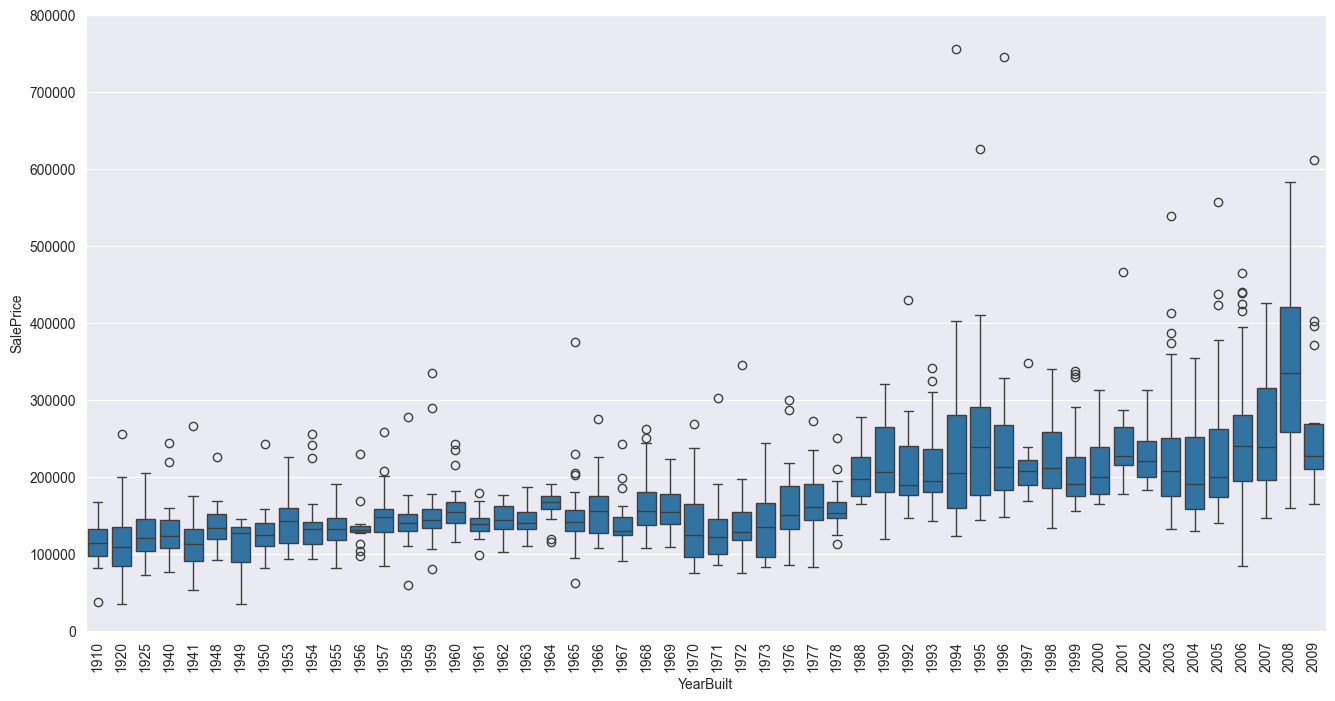

In [130]:
data_temp = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [131]:
print('Можно наблюдать тенденцию к повышению цен на жильё по мере того, как здания становятся новее. У старых строений отмечаются отклонения стоимости как в меньшую, так и в большую сторону. Это, вероятно, связано с состоянием сохранности жилья и его исторической ценностью')

Можно наблюдать тенденцию к повышению цен на жильё по мере того, как здания становятся новее. У старых строений отмечаются отклонения стоимости как в меньшую, так и в большую сторону. Это, вероятно, связано с состоянием сохранности жилья и его исторической ценностью
